<a href="https://colab.research.google.com/github/FaizalLeviansyah/computational_statistics/blob/master/Statkom_UAS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARKINSON CALCULATE LINIER**

 **IMPORT LIBRARY**

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gspread
import csv
from google.colab import auth
from google.colab import files
from  sklearn import linear_model

 **Import the data**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gdown

# Define the Google Sheets URL
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1_hsbboROP0BGGcddHl6JmU5b-7iaool7Cz3Glgp9OPA/edit?usp=sharing'

# Get the file ID from the URL
file_id = spreadsheet_url.split('/')[-2]

# Define the export URL for CSV format
export_url = f'https://docs.google.com/spreadsheets/export?id={file_id}&exportFormat=csv'

# Download the CSV file
output_file = '/content/combined_data.csv'  # Specify the path to save the file
gdown.download(export_url, output_file, quiet=False)

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1_hsbboROP0BGGcddHl6JmU5b-7iaool7Cz3Glgp9OPA
  warnings.warn(
Downloading...
From: https://docs.google.com/spreadsheets/export?id=1_hsbboROP0BGGcddHl6JmU5b-7iaool7Cz3Glgp9OPA&exportFormat=csv
To: /content/combined_data.csv
80.8kB [00:00, 35.9MB/s]


'/content/combined_data.csv'

In [ ]:
data_df = pd.read_csv('combined_data.csv')
data_df

,timestamp,heart_rate,steps,stress_score,awake,deep,light,rem,nonrem_total,total,nonrem_percentage,sleep_efficiency,time_from_last_drug_taken,wo_duration,timestamp_hour,timestamp_dayofweek,timestamp_hour_sin,timestamp_hour_cos,wearing_off,participant
0,11/25/2021 0:00,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,3,"-7,63E-07",1,0,participant1
1,11/25/2021 0:15,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,3,65.403.129,997.858.923,0,participant1
2,11/25/2021 0:30,4.341.935.484,0,-0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,3,130.526.192,991.444.861,0,participant1
3,11/25/2021 0:45,60.25,0,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,3,195.090.322,98.078.528,0,participant1
4,11/25/2021 1:00,10.6,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,3,258.819.045,965.925.826,0,participant1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,12/1/2021 22:45,1.161.166.667,504,16.0,1.0,54.0,236.0,47.0,290.0,337.0,860.534.125,99.704.142,37,730.0,22,2,-321.439.465,946.930.129,0,participant1
668,12/1/2021 23:00,1.036.166.667,138,15.2,1.0,54.0,236.0,47.0,290.0,337.0,860.534.125,99.704.142,52,745.0,23,2,-258.819.045,965.925.826,0,participant1
669,12/1/2021 23:15,93.4,0,47.0,1.0,54.0,236.0,47.0,290.0,337.0,860.534.125,99.704.142,67,760.0,23,2,-195.090.322,98.078.528,0,participant1
670,12/1/2021 23:30,86.16,0,8.6,1.0,54.0,236.0,47.0,290.0,337.0,860.534.125,99.704.142,82,775.0,23,2,-130.526.192,991.444.861,0,participant1


**Normalize The Data**

In [ ]:
data_df.isnull().sum()

In [ ]:
dfnew = data_df.dropna()


In [ ]:
x = dfnew[['time_from_last_drug_taken', 'timestamp_hour', 'timestamp_dayofweek']]
y = dfnew['wearing_off']

y

96     1.0
97     1.0
98     1.0
99     1.0
100    1.0
      ... 
667    0.0
668    0.0
669    0.0
670    0.0
671    0.0
Name: wearing_off, Length: 576, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# Melakukan normalisasi data
normalized_data = scaler.fit_transform(x)

# Menampilkan hasil normalisasi
print(normalized_data)


[[0.28571429 0.         0.66666667]
 [0.30952381 0.         0.66666667]
 [0.33333333 0.         0.66666667]
 ...
 [0.10634921 1.         0.33333333]
 [0.13015873 1.         0.33333333]
 [0.15396825 1.         0.33333333]]


**Calculate Multiple Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split


# Membagi dataset menjadi subset pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.2, random_state=42)

# Menampilkan hasil pemisahan dataset
print("Subset Pelatihan (X_train):", X_train)
print("Subset Pengujian (X_test):", X_test)
print("Label Pelatihan (y_train):", y_train)
print("Label Pengujian (y_test):", y_test)


Subset Pelatihan (X_train): [[0.24761905 0.56521739 0.16666667]
 [0.02698413 0.65217391 0.66666667]
 [0.4        0.17391304 1.        ]
 ...
 [0.14126984 0.82608696 1.        ]
 [0.2        0.52173913 0.16666667]
 [0.3968254  0.04347826 0.83333333]]
Subset Pengujian (X_test): [[0.0952381  0.43478261 1.        ]
 [0.77777778 0.2173913  0.83333333]
 [0.23809524 0.60869565 0.        ]
 [0.63174603 0.17391304 0.33333333]
 [0.66984127 0.17391304 0.16666667]
 [0.62222222 0.17391304 0.16666667]
 [0.08571429 0.69565217 1.        ]
 [0.97619048 0.30434783 0.66666667]
 [0.14285714 0.86956522 0.66666667]
 [0.14603175 1.         0.        ]
 [0.14920635 0.91304348 0.16666667]
 [0.2        0.65217391 0.16666667]
 [0.03333333 0.95652174 1.        ]
 [0.12222222 0.73913043 0.        ]
 [0.03492063 0.56521739 0.33333333]
 [0.26190476 0.73913043 0.83333333]
 [0.02222222 0.7826087  1.        ]
 [0.19066138 0.56521739 0.66666667]
 [0.03015873 0.47826087 0.33333333]
 [0.12063492 0.60869565 0.83333333]
 [0

**Visualized the Data Linier**

Koefisien regresi: [-0.18368448 -0.12172017  0.05422996]
Intersep: 0.15100012867308907
Prediksi nilai target: [ 0.13481452  0.02686515  0.03317519  0.03186612  0.01583029  0.02457717
  0.10481081 -0.02920287  0.05506917  0.00245619  0.02149576  0.04391884
  0.08267929  0.03858272  0.09386405  0.05811684  0.10588895  0.08333355
  0.1053231   0.09994247  0.02586908  0.05031606 -0.00258222  0.13135982
  0.12673933  0.05536062  0.11077422  0.06775568  0.08747645  0.07440042
  0.05302847  0.11270027  0.05012976  0.09119593  0.14102544  0.05944261
  0.0803534   0.07785511  0.10313934  0.03219536  0.07769594  0.08090279
 -0.01066413  0.07874707  0.06686372  0.07243704  0.1018407   0.18861102
  0.09281292  0.04186098  0.10114291 -0.05398524 -0.05252754 -0.03357631
  0.13044108  0.04524438  0.10396986  0.01145685  0.07630908  0.05069573
  0.13719131  0.07348167  0.03503992  0.12592528  0.07877386  0.08949072
  0.12710185  0.11081839  0.09054162  0.04428159  0.04127797  0.07237675
  0.07597996  

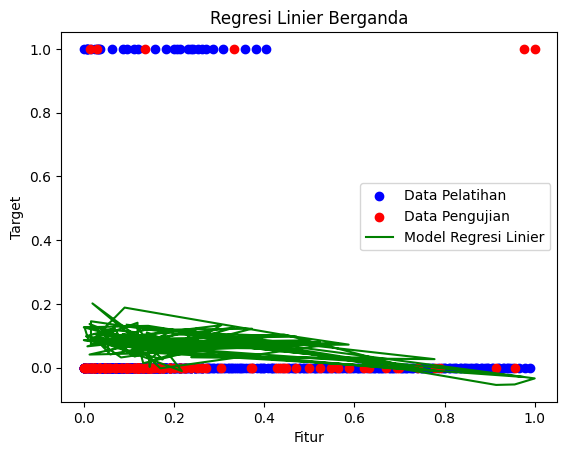

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import numpy as np

# Membuat objek model regresi linier
model = LinearRegression()

# Melatih model dengan data pelatihan
model.fit(X_train, y_train)

# Memprediksi nilai target dengan data pengujian
y_pred = model.predict(X_test)

# Menghitung R-square
r2 = r2_score(y_test, y_pred)

# Menghitung mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Menampilkan hasil
print("Koefisien regresi:", model.coef_)
print("Intersep:", model.intercept_)
print("Prediksi nilai target:", y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-square:", r2)


# Visualisasi model
plt.scatter(X_train[:, 0], y_train, color='blue', label='Data Pelatihan')
plt.scatter(X_test[:, 0], y_test, color='red', label='Data Pengujian')
plt.plot(X_test[:, 0], y_pred, color='green', label='Model Regresi Linier')
plt.xlabel('Fitur')
plt.ylabel('Target')
plt.title('Regresi Linier Berganda')
plt.legend()
plt.show()


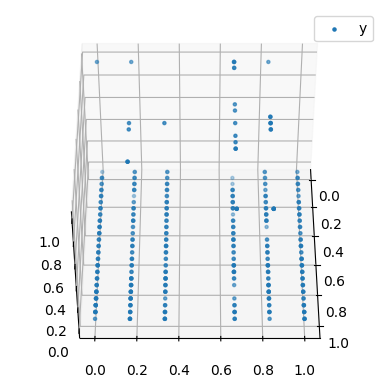

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection ='3d')

ax.scatter(X_train[:, 1], X_train[:, 2], y_train, label ='y', s = 5)
ax.legend()
ax.view_init(45, 0)

plt.show()

Kesimpul prediksi hasil pemodelan menggunakan regrsi linear, menunjukan bahwa model berhasil menunjukan hasil yang akurat. Hal ini terbukti dari skor MSE sebesar 0.05 yang berarti model tersebut memiliki eror yang kecil